<a href="https://colab.research.google.com/github/vaishnavi7899/Comcast-Complaints/blob/master/COMCASTPROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORT LIBRARIES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns 

1)IMPORT DATASET


In [3]:
dataset= pd.read_csv('Comcast Telecom Complaints data 1.csv')
X = dataset.iloc[:, :-1].values
print(X)



[['250635' 'Comcast Cable Internet Speeds' '22-04-2015' ... 'Maryland'
  21009 'No']
 ['223441' 'Payment disappear - service got disconnected' '4/8/2015' ...
  'Georgia' 30102 'No']
 ['242732' 'Speed and Service' '18-04-2015' ... 'Georgia' 30101 'Yes']
 ...
 ['331188' 'complaint about comcast' '6/9/2015' ... 'Michigan' 48197 'No']
 ['360489' 'Extremely unsatisfied Comcast customer' '23-06-2015' ...
  'Michigan' 48197 'No']
 ['363614' 'Comcast, Ypsilanti MI Internet Speed' '24-06-2015' ...
  'Michigan' 48198 'Yes']]


ENCODING CATEGORICAL DATA


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cust_comp = le.fit_transform(dataset.iloc[:,1])
print(cust_comp)
rec_via = le.fit_transform(dataset.iloc[:,4])
print(rec_via)
city = le.fit_transform(dataset.iloc[:,5])
print(city)
state = le.fit_transform(dataset.iloc[:,6])
print(state)
onbehalf = le.fit_transform(dataset.iloc[:,8])
print(onbehalf)


[ 245 1327 1448 ... 1686  971  818]
[0 1 1 ... 1 0 0]
[  0   1   1 ... 927 927 927]
[18 10 10 ... 20 20 20]
[0 0 1 ... 0 0 1]


OBTAINING DATE,MONTH AND YEAR SEPERATELY
REMOVING UNNECESSARY DATA(TICKET,ZIPCODE,TIME)


In [5]:
dataset['year'] = pd.DatetimeIndex(dataset['Date']).year
dataset['month'] = pd.DatetimeIndex(dataset['Date']).month
dataset['day'] = pd.DatetimeIndex(dataset['Date']).day
dataset.drop(["Ticket #", "Time","Zip code","Date"], axis = 1, inplace = True) 

dataset.head()


,Customer Complaint,Received Via,City,State,Filing on Behalf of Someone,Status,year,month,day
0,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,No,Closed,2015,4,22
1,Payment disappear - service got disconnected,Internet,Acworth,Georgia,No,Closed,2015,4,8
2,Speed and Service,Internet,Acworth,Georgia,Yes,Closed,2015,4,18
3,Comcast Imposed a New Usage Cap of 300GB that ...,Internet,Acworth,Georgia,Yes,Open,2015,5,7
4,Comcast not working and no service to boot,Internet,Acworth,Georgia,No,Solved,2015,5,26


2)TO OBTAIN NO OF COMPLAINTS IN MONTHLY AND DAILY FORMAT

In [128]:
noc_pm = dataset['month'].value_counts()
print(noc_pm)

  

6    1280
4     545
5     399
Name: month, dtype: int64


BY VIEWING THE ABOVE OUTPUT IT IS CLEAR THAT JUNE HAS HIGHEST NO OF COMPLAINTS LODGED WITH 1280 COMPLAINTS

In [116]:
noc_pd = dataset['day'].value_counts()
print(noc_pd)

24    249
23    225
25    126
26     90
29     87
30     86
27     81
28     79
18     69
13     68
8      67
22     66
12     65
16     65
17     60
2      59
15     58
1      55
9      55
14     54
10     53
20     51
19     50
5      49
7      49
3      45
21     41
11     38
6      38
4      36
31     10
Name: day, dtype: int64


LINE PLOT REPRESENTING MONTHLY GRANULARITY LEVELS

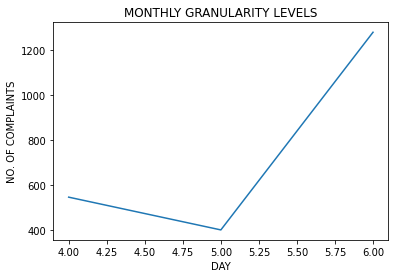

In [148]:
sns.lineplot( data = noc_pm)
plt.title('MONTHLY GRANULARITY LEVELS')
plt.xlabel('DAY')
plt.ylabel('NO. OF COMPLAINTS')
plt.show()


LINE PLOT REPRESENTING DAILY GRANULARITY LEVELS

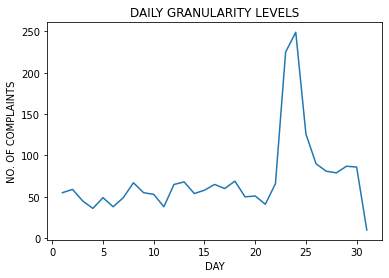

In [146]:
sns.lineplot( data = noc_pd)
plt.title('DAILY GRANULARITY LEVELS')
plt.xlabel('DAY')
plt.ylabel('NO. OF COMPLAINTS')
plt.show()


3)FREQUENCY TABLE OF LODGED COMPLAINTS

In [9]:
dataset['Customer Complaint'] = dataset['Customer Complaint'].str.title()
comp = dataset['Customer Complaint'].value_counts()
print(comp)


Comcast                                                                             102
Comcast Data Cap                                                                     30
Comcast Internet                                                                     29
Comcast Data Caps                                                                    21
Comcast Billing                                                                      18
                                                                                   ... 
Service Complaint                                                                     1
Internet Service Is Down For Three Weeks Now.                                         1
Service Outages (Comcast)                                                             1
Repeatedly Have Been Promised Installations Without Anyone Arriving Or Notifying      1
Comcast Runaround                                                                     1
Name: Customer Complaint, Length

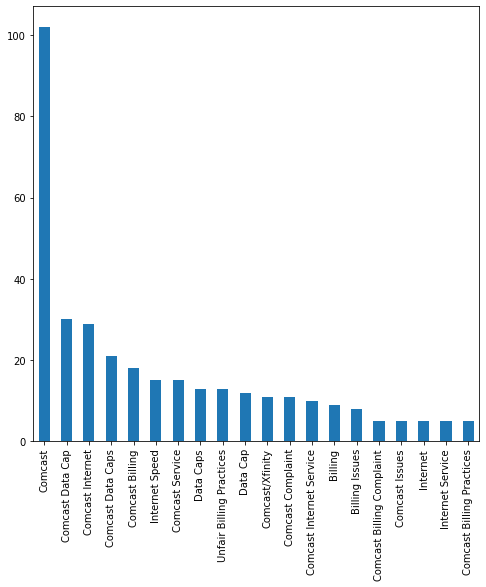

In [10]:
dataset['Customer Complaint'].value_counts()[:20].plot(kind='bar',figsize=(8,8),stacked=True)

4,7)TO FIND MAX LODGED COMPLAINT AND THE STATE THAT HAS LODGED MAX COMPLAINT

In [11]:
print('The most lodged complaint is : ',dataset.iloc[:,0].value_counts().idxmax())
print('The city that has lodged most number of complaints is :',dataset.iloc[:,2].value_counts().idxmax())
print('The state that has lodged most number of complaints is :',dataset.iloc[:,3].value_counts().idxmax())

The most lodged complaint is :  Comcast
The city that has lodged most number of complaints is : Atlanta
The state that has lodged most number of complaints is : Georgia


5)NEW VARIABLE WITH OPEN AND PENDING AS OPEN,CLOSED AND SOLVED AS CLOSED

In [12]:
dataset["finalstatus"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed"  for Status in dataset["Status"]]
dataset["finalstatus"].unique()
dataset.head()

,Customer Complaint,Received Via,City,State,Filing on Behalf of Someone,Status,year,month,day,finalstatus
0,Comcast Cable Internet Speeds,Customer Care Call,Abingdon,Maryland,No,Closed,2015,4,22,Closed
1,Payment Disappear - Service Got Disconnected,Internet,Acworth,Georgia,No,Closed,2015,4,8,Closed
2,Speed And Service,Internet,Acworth,Georgia,Yes,Closed,2015,4,18,Closed
3,Comcast Imposed A New Usage Cap Of 300Gb That ...,Internet,Acworth,Georgia,Yes,Open,2015,5,7,Open
4,Comcast Not Working And No Service To Boot,Internet,Acworth,Georgia,No,Solved,2015,5,26,Closed


6)STATE WISE STATUS OF COMPLAINT


In [13]:
dataset['State'] = dataset['State'].str.title() 
statecomp = dataset.groupby(['State','finalstatus']).size().unstack().fillna(0)
statecomp

finalstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,15.0,2.0
Florida,201.0,39.0


GRAPH REPRESENTING THE STATUS OF COMPLAINTS IN STATES

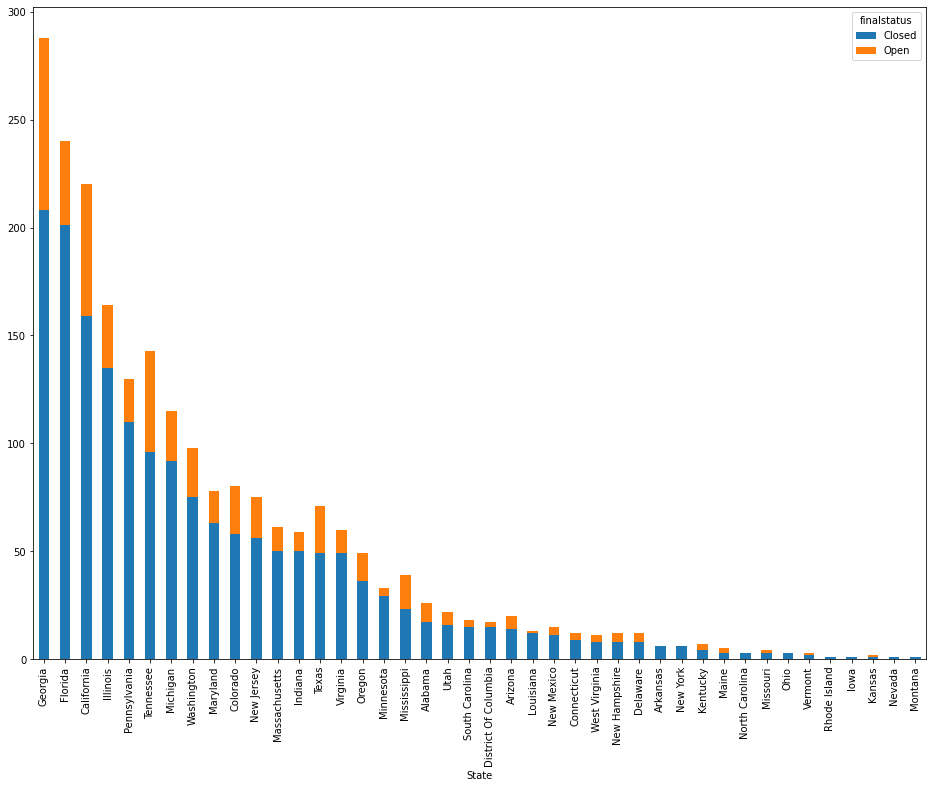

In [14]:
a = statecomp.sort_values("Closed",axis = 0,ascending=False)
a.plot(kind="bar", figsize=(16,12), stacked=True)


8) TO SEE WHICH STATE HAS MORE UNRESOLVED COMPLAINTS

In [15]:
print(a)
print('The maximum no of unresolved complaints is:',a.max())

finalstatus           Closed  Open
State                             
Georgia                208.0  80.0
Florida                201.0  39.0
California             159.0  61.0
Illinois               135.0  29.0
Pennsylvania           110.0  20.0
Tennessee               96.0  47.0
Michigan                92.0  23.0
Washington              75.0  23.0
Maryland                63.0  15.0
Colorado                58.0  22.0
New Jersey              56.0  19.0
Massachusetts           50.0  11.0
Indiana                 50.0   9.0
Texas                   49.0  22.0
Virginia                49.0  11.0
Oregon                  36.0  13.0
Minnesota               29.0   4.0
Mississippi             23.0  16.0
Alabama                 17.0   9.0
Utah                    16.0   6.0
South Carolina          15.0   3.0
District Of Columbia    15.0   2.0
Arizona                 14.0   6.0
Louisiana               12.0   1.0
New Mexico              11.0   4.0
Connecticut              9.0   3.0
West Virginia       

9)PERCENTAGE OF COMPLAINTS RESOLVED TILL DATE

In [16]:
info = dataset.groupby(['Received Via','finalstatus']).size().unstack().fillna(0)
print(info)

finalstatus         Closed  Open
Received Via                    
Customer Care Call     864   255
Internet               843   262


In [17]:
total_comp =info['Closed']+info['Open']
print('The total complaints',total_comp)
percentage = info['Closed']/total_comp*100
print('The percentage of complaints resolved',percentage)

The total complaints Received Via
Customer Care Call    1119
Internet              1105
dtype: int64
The percentage of complaints resolved Received Via
Customer Care Call    77.211796
Internet              76.289593
dtype: float64


CONSTRUCTING A DATAFRAME WITH ALL ENCODED VARIABLES


In [18]:
year = dataset.iloc[:,6]
month = dataset.iloc[:,7]
day = dataset.iloc[:,8]
import pandas as pd  
lst = [cust_comp,rec_via,city,state,onbehalf,year,month,day]
df_t = pd.DataFrame(lst) 
df = df_t.T
print(df) 

         0  1    2   3  4     5  6   7
0      245  0    0  18  0  2015  4  22
1     1327  1    1  10  0  2015  4   8
2     1448  1    1  10  1  2015  4  18
3      329  1    1  10  1  2015  5   7
4      688  1    1  10  0  2015  5  26
...    ... ..  ...  .. ..   ... ..  ..
2219  1406  0  926   9  0  2015  4   2
2220   386  0  927  20  0  2015  6   2
2221  1686  1  927  20  0  2015  6   9
2222   971  0  927  20  0  2015  6  23
2223   818  0  927  20  1  2015  6  24

[2224 rows x 8 columns]


SETTING STATUS AS Y TO PREDICT IF THE COMPLAINT LODGED WILL BE OPEN OR CLOSED 

In [20]:

y = dataset.iloc[:,9]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
y = y.reshape(len(y),1)
y


[0 0 0 ... 0 0 1]


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

SPLITTING DATA INTO TRAIN AND TEST 

In [21]:

from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size = 0.25, random_state = 0)

print(df_train)

print(df_test)

print(y_test)

print(y_train)

         0  1    2   3  4     5  6   7
92    1520  0   29  10  0  2015  5  26
2043   256  0  837   4  0  2015  6   9
1821  1366  0  741   3  0  2015  6  23
878    182  0  378  37  0  2015  6  12
1108  1074  0  437   9  0  2015  5   9
...    ... ..  ...  .. ..   ... ..  ..
1033   226  1  419  33  0  2015  5  18
1731  1352  0  719   3  0  2015  6  26
763    525  1  311  11  1  2015  5  26
835     64  1  361   4  0  2015  4  21
1653  1747  0  681  27  0  2015  4  20

[1668 rows x 8 columns]
         0  1    2   3  4     5  6   7
384   1475  0  143  40  0  2015  6   3
1982  1595  1  803  20  0  2015  6  27
985    634  0  399  27  0  2015  6   1
1386   661  1  563  36  0  2015  5  26
1294  1405  0  518   3  0  2015  6  11
...    ... ..  ...  .. ..   ... ..  ..
1025   897  0  414  10  0  2015  6  28
227    125  0   76  20  0  2015  6  17
1559  1462  0  645  33  0  2015  5  14
1151  1295  0  457   2  0  2015  5   5
526     58  0  192   3  0  2015  6  24

[556 rows x 8 columns]
[[0]
 [0]
 [0]


FEATURE SCALING

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df_train = sc.fit_transform(df_train)
df_test = sc.fit_transform(df_test)

print(df_test)

print(df_train)


[[ 1.09766476 -0.98926624 -1.09213487 ...  0.          0.84926868
  -1.8107605 ]
 [ 1.31528765  1.01085023  1.34880024 ...  0.          0.84926868
   1.07193911]
 [-0.42750893 -0.98926624 -0.14534792 ...  0.          0.84926868
  -2.05098547]
 ...
 [ 1.07408895 -0.98926624  0.76445516 ...  0.         -0.31091163
  -0.48952318]
 [ 0.77123044 -0.98926624  0.0691585  ...  0.         -0.31091163
  -1.57053553]
 [-1.47209876 -0.98926624 -0.91091393 ...  0.          0.84926868
   0.71160166]]
[[ 1.20852785 -0.99521528 -1.56783795 ...  0.         -0.42017156
   0.91316054]
 [-1.13452292 -0.99521528  1.42017376 ...  0.          0.77581164
  -1.10300237]
 [ 0.92306122 -0.99521528  1.06516247 ...  0.          0.77581164
   0.55736708]
 ...
 [-0.63588316  1.00480772 -0.52499228 ...  0.         -0.42017156
   0.91316054]
 [-1.49042936  1.00480772 -0.34009057 ...  0.         -1.61615476
   0.32017145]
 [ 1.62931307 -0.99521528  0.84328041 ...  0.         -1.61615476
   0.20157363]]


DECISION TREE MODEL

In [23]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(df_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

TO PREDICT THE TEST RESULT

In [24]:
y_pred = regressor.predict(df_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0. 0.]
 [1. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
a = accuracy_score(y_test,y_pred)
print('The accuracy of the model is :',a*100)

[[363  75]
 [ 74  44]]
The accuracy of the model is : 73.20143884892086
